# **Part 3.5: Statistical Analysis - VIF & Statistical Tests**

# Table of Contents

1. [Multicollinearity Detection (VIF)](#multicollinearity-detection-vif)
2. [Statistical Tests](#statistical-tests)
3. [Correlation Analysis Advanced](#correlation-analysis-advanced)


# **📚 Setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned data
df = pd.read_csv('data_ready_for_modeling.csv')



# **🔍 Step 1: Understanding Multicollinearity**

# **1. Multicollinearity Detection (VIF)**

💡 **MULTICOLLINEARITY**  
When two or more independent variables are highly correlated with each other.

❓ **WHY IS IT A PROBLEM?**
1. Makes it hard to determine individual feature effects  
2. Inflates coefficient standard errors (unstable estimates)  
3. Makes feature importance unreliable  
4. Can lead to overfitting  

📊 **WHEN TO WORRY?**
- **VIF > 5** — Moderate multicollinearity  
- **VIF > 10** — High multicollinearity (serious problem)  
- **VIF > 100** — Severe multicollinearity (must fix)  

🔧 **SOLUTIONS**
1. Remove one of the correlated features  
2. Combine correlated features (PCA, averaging)  
3. Use regularization (Ridge, Lasso)  
4. Use tree-based models (less affected)


# **📊 Step 2: Calculate Variance Inflation Factor (VIF)**

💡 **Variance Inflation Factor (VIF) Formula**

\[
\text{VIF}(i) = \frac{1}{1 - R^2(i)}
\]

Where:  
- \(R^2(i)\) is the R-squared obtained by regressing feature \(i\) on all other features.


In [3]:
print("\n" + "="*80)
print("STEP 2: CALCULATE VIF (Variance Inflation Factor)")
print("="*80)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable and IDs
numerical_cols = [col for col in numerical_cols
                  if col not in ['Churn', 'customerID', 'SeniorCitizen']]

print(f"Analyzing {len(numerical_cols)} numerical features for multicollinearity\n")

# Prepare data (VIF requires no missing values)
df_vif = df[numerical_cols].dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns

# Calculate VIF values
vif_values = []
for i in range(len(df_vif.columns)):
    try:
        vif = variance_inflation_factor(df_vif.values, i)
        vif_values.append(vif)
    except:
        vif_values.append(np.nan)

vif_data["VIF"] = vif_values

# Sort by VIF value
vif_data = vif_data.sort_values('VIF', ascending=False)

print("VIF Analysis Results:")
print("="*60)
print(vif_data.to_string(index=False))

# Categorize severity
print("\n" + "="*60)
print("MULTICOLLINEARITY SEVERITY:")
print("="*60)

low_vif = vif_data[vif_data['VIF'] < 5]
moderate_vif = vif_data[(vif_data['VIF'] >= 5) & (vif_data['VIF'] < 10)]
high_vif = vif_data[vif_data['VIF'] >= 10]

print(f"\n✅ Low (VIF < 5): {len(low_vif)} features")
if len(low_vif) > 0:
    print(f"   {low_vif['Feature'].tolist()}")

print(f"\n⚠️  Moderate (5 ≤ VIF < 10): {len(moderate_vif)} features")
if len(moderate_vif) > 0:
    print(f"   {moderate_vif['Feature'].tolist()}")

print(f"\n❌ High (VIF ≥ 10): {len(high_vif)} features")
if len(high_vif) > 0:
    print(f"   {high_vif['Feature'].tolist()}")
    print("   ⚠️  ACTION REQUIRED: Remove or combine these features!")


STEP 2: CALCULATE VIF (Variance Inflation Factor)
Analyzing 40 numerical features for multicollinearity



/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF Analysis Results:
                  Feature        VIF
                   tenure        inf
            TotalServices        inf
          AccountAgeYears        inf
        TotalServicesUsed        inf
      ServiceAdoptionRate        inf
           MonthlyCharges 116.344885
            SignupQuarter 108.521962
   MonthlyCharges_squared 100.232898
              SignupMonth  82.505265
       TotalAddonServices  65.088370
        ServiceValueRatio  45.568433
               SignupYear  43.437974
     PhoneService_encoded  31.339175
  tenure_x_MonthlyCharges  22.450601
           tenure_squared  17.288002
         ChargePerService  11.951313
            DownloadSpeed  10.422074
             TotalCharges   8.350519
              UploadSpeed   8.180397
              HasAnyAddon   5.814955
         Contract_encoded   3.864908
         HasFiberInternet   3.393470
          SignupDayOfWeek   3.174681
        AvgChargePerMonth   2.798470
 PaperlessBilling_encoded   2.440416
      AvgChargeP

# **📊 Step 3: Visualize VIF Results**


STEP 3: VISUALIZE VIF RESULTS


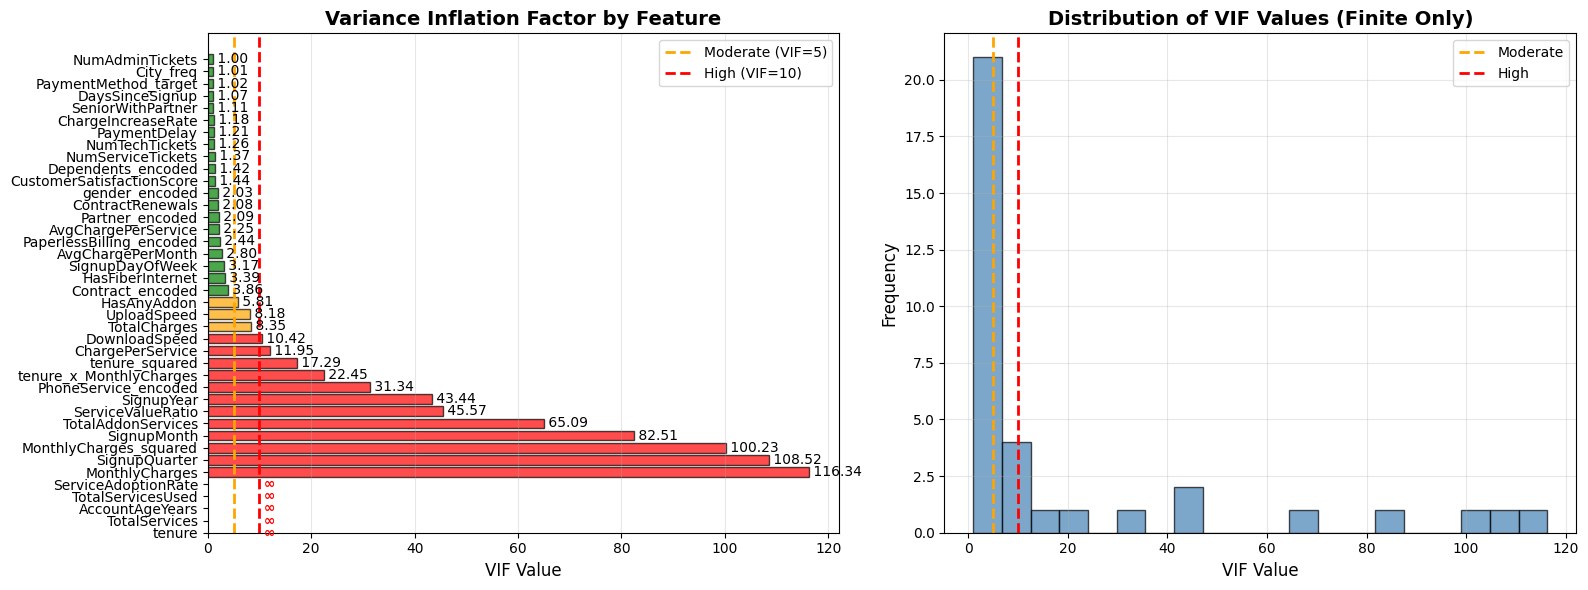

✅ VIF visualization saved as 'vif_analysis.png'


In [5]:
import numpy as np
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("STEP 3: VISUALIZE VIF RESULTS")
print("="*80)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: VIF Bar Chart
colors = ['red' if x >= 10 else 'orange' if x >= 5 else 'green'
          for x in vif_data['VIF']]

axes[0].barh(range(len(vif_data)), vif_data['VIF'], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(vif_data)))
axes[0].set_yticklabels(vif_data['Feature'])
axes[0].set_xlabel('VIF Value', fontsize=12)
axes[0].set_title('Variance Inflation Factor by Feature', fontsize=14, fontweight='bold')
axes[0].axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Moderate (VIF=5)')
axes[0].axvline(x=10, color='red', linestyle='--', linewidth=2, label='High (VIF=10)')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels (handle inf values)
for i, v in enumerate(vif_data['VIF'].values):
    if np.isfinite(v):
        axes[0].text(v, i, f' {v:.2f}', va='center')
    else:
        axes[0].text(10, i, ' ∞', va='center', color='red', fontweight='bold')  # mark inf values

# Plot 2: VIF Distribution (exclude inf)
vif_finite = vif_data['VIF'].replace([np.inf, -np.inf], np.nan).dropna()
axes[1].hist(vif_finite, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('VIF Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of VIF Values (Finite Only)', fontsize=14, fontweight='bold')
axes[1].axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Moderate')
axes[1].axvline(x=10, color='red', linestyle='--', linewidth=2, label='High')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('vif_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ VIF visualization saved as 'vif_analysis.png'")


# **🛠️ Step 4: Handle Multicollinearity**

In [6]:


features_to_remove = high_vif['Feature'].tolist()
if len(features_to_remove) > 0:
    print(f"Removing {len(features_to_remove)} features with VIF > 10:")
    for feat in features_to_remove:
        print(f"   • {feat}")

    # Create dataset without high VIF features
    df_no_multicol = df.drop(columns=features_to_remove, errors='ignore')
    print(f"\n✅ Dataset reduced from {len(df.columns)} to {len(df_no_multicol.columns)} columns")
else:
    print("✅ No features with VIF > 10 found!")
    df_no_multicol = df.copy()

# Method 2: Show correlated pairs
print("\n" + "="*60)
print("Method 2: Identify Highly Correlated Pairs")
print("="*60)

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Find highly correlated pairs (> 0.9)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if len(high_corr_pairs) > 0:
    print(f"Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.9):")
    for pair in high_corr_pairs:
        print(f"   • {pair['Feature_1']} ↔ {pair['Feature_2']}: r = {pair['Correlation']:.3f}")
    print("\n💡 Consider removing one feature from each pair")
else:
    print("✅ No highly correlated pairs (|r| > 0.9) found!")

# Save cleaned data
df_no_multicol.to_csv('data_no_multicollinearity.csv', index=False)
print("\n✅ Data without multicollinearity saved!")


STEP 4: HANDLE MULTICOLLINEARITY
Method 1: Remove High VIF Features
------------------------------------------------------------
Removing 17 features with VIF > 10:
   • tenure
   • TotalServices
   • AccountAgeYears
   • TotalServicesUsed
   • ServiceAdoptionRate
   • MonthlyCharges
   • SignupQuarter
   • MonthlyCharges_squared
   • SignupMonth
   • TotalAddonServices
   • ServiceValueRatio
   • SignupYear
   • PhoneService_encoded
   • tenure_x_MonthlyCharges
   • tenure_squared
   • ChargePerService
   • DownloadSpeed

✅ Dataset reduced from 70 to 53 columns

Method 2: Identify Highly Correlated Pairs
Found 14 highly correlated pairs (|r| > 0.9):
   • tenure ↔ AccountAgeYears: r = 1.000
   • tenure ↔ tenure_squared: r = 0.968
   • MonthlyCharges ↔ MonthlyCharges_squared: r = 0.989
   • DownloadSpeed ↔ UploadSpeed: r = 0.936
   • AccountAgeYears ↔ tenure_squared: r = 0.968
   • TotalServicesUsed ↔ TotalServices: r = 1.000
   • TotalServicesUsed ↔ TotalAddonServices: r = 0.963
   • 

# **2. Statistical Tests**

# **🧪 Step 1: Normality Tests**

## **Normality Tests**

Normality tests check if a numerical feature follows a **normal (bell-shaped) distribution**, which is an assumption for many statistical tests like t-test, ANOVA, and regression.  

**Common Tests:**

- **Shapiro-Wilk** — Sensitive for small to medium samples; `p > 0.05` → normal  
- **Kolmogorov-Smirnov** — Compares data to a normal distribution  
- **Anderson-Darling** — Focuses more on tail differences  

💡 **Interpretation:**  
- `p > 0.05` → Data appears normal  
- `p ≤ 0.05` → Data deviates from normality  

**Tip:** If data is not normal, use **non-parametric tests** or **transform the data**.


In [9]:


# Test if numerical features follow normal distribution
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Testing normality for key features:\n")

normality_results = []

for feature in numerical_features:
    if feature in df.columns:
        data = df[feature].dropna()

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))

        # Kolmogorov-Smirnov Test
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))

        # Anderson-Darling Test
        anderson_result = stats.anderson(data)

        normality_results.append({
            'Feature': feature,
            'Shapiro_Stat': shapiro_stat,
            'Shapiro_p': shapiro_p,
            'KS_Stat': ks_stat,
            'KS_p': ks_p,
            'Normal': 'Yes' if shapiro_p > 0.05 else 'No'
        })

        print(f"{feature}:")
        print(f"   Shapiro-Wilk: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
        print(f"   K-S Test: statistic={ks_stat:.4f}, p-value={ks_p:.4f}")
        print(f"   Anderson-Darling: statistic={anderson_result.statistic:.4f}")
        print(f"   Normal Distribution: {'✅ Yes' if shapiro_p > 0.05 else '❌ No'}")
        print()

# Summary
normality_df = pd.DataFrame(normality_results)
print("\nNormality Test Summary:")
print(normality_df.to_string(index=False))



Testing normality for key features:

tenure:
   Shapiro-Wilk: statistic=0.9503, p-value=0.0000
   K-S Test: statistic=0.0722, p-value=0.0000
   Anderson-Darling: statistic=82.9984
   Normal Distribution: ❌ No

MonthlyCharges:
   Shapiro-Wilk: statistic=0.9709, p-value=0.0000
   K-S Test: statistic=0.0405, p-value=0.0000
   Anderson-Darling: statistic=33.5744
   Normal Distribution: ❌ No

TotalCharges:
   Shapiro-Wilk: statistic=0.8337, p-value=0.0000
   K-S Test: statistic=0.0980, p-value=0.0000
   Anderson-Darling: statistic=83.9561
   Normal Distribution: ❌ No


Normality Test Summary:
       Feature  Shapiro_Stat    Shapiro_p  KS_Stat         KS_p Normal
        tenure      0.950305 3.588735e-38 0.072180 7.144486e-31     No
MonthlyCharges      0.970886 1.035076e-30 0.040549 5.427875e-10     No
  TotalCharges      0.833742 3.779926e-58 0.098027 1.254722e-56     No


## **Normality Test Summary (Key Features)**

- **Tenure, MonthlyCharges, TotalCharges** — All three features do **not** follow a normal distribution (`p < 0.05` in Shapiro-Wilk, K-S, and Anderson-Darling tests)  

💡 **Implication:**  
- Parametric tests that assume normality (like t-tests or ANOVA) may **not be fully appropriate** for these features  
- Use **non-parametric tests** or **data transformations**


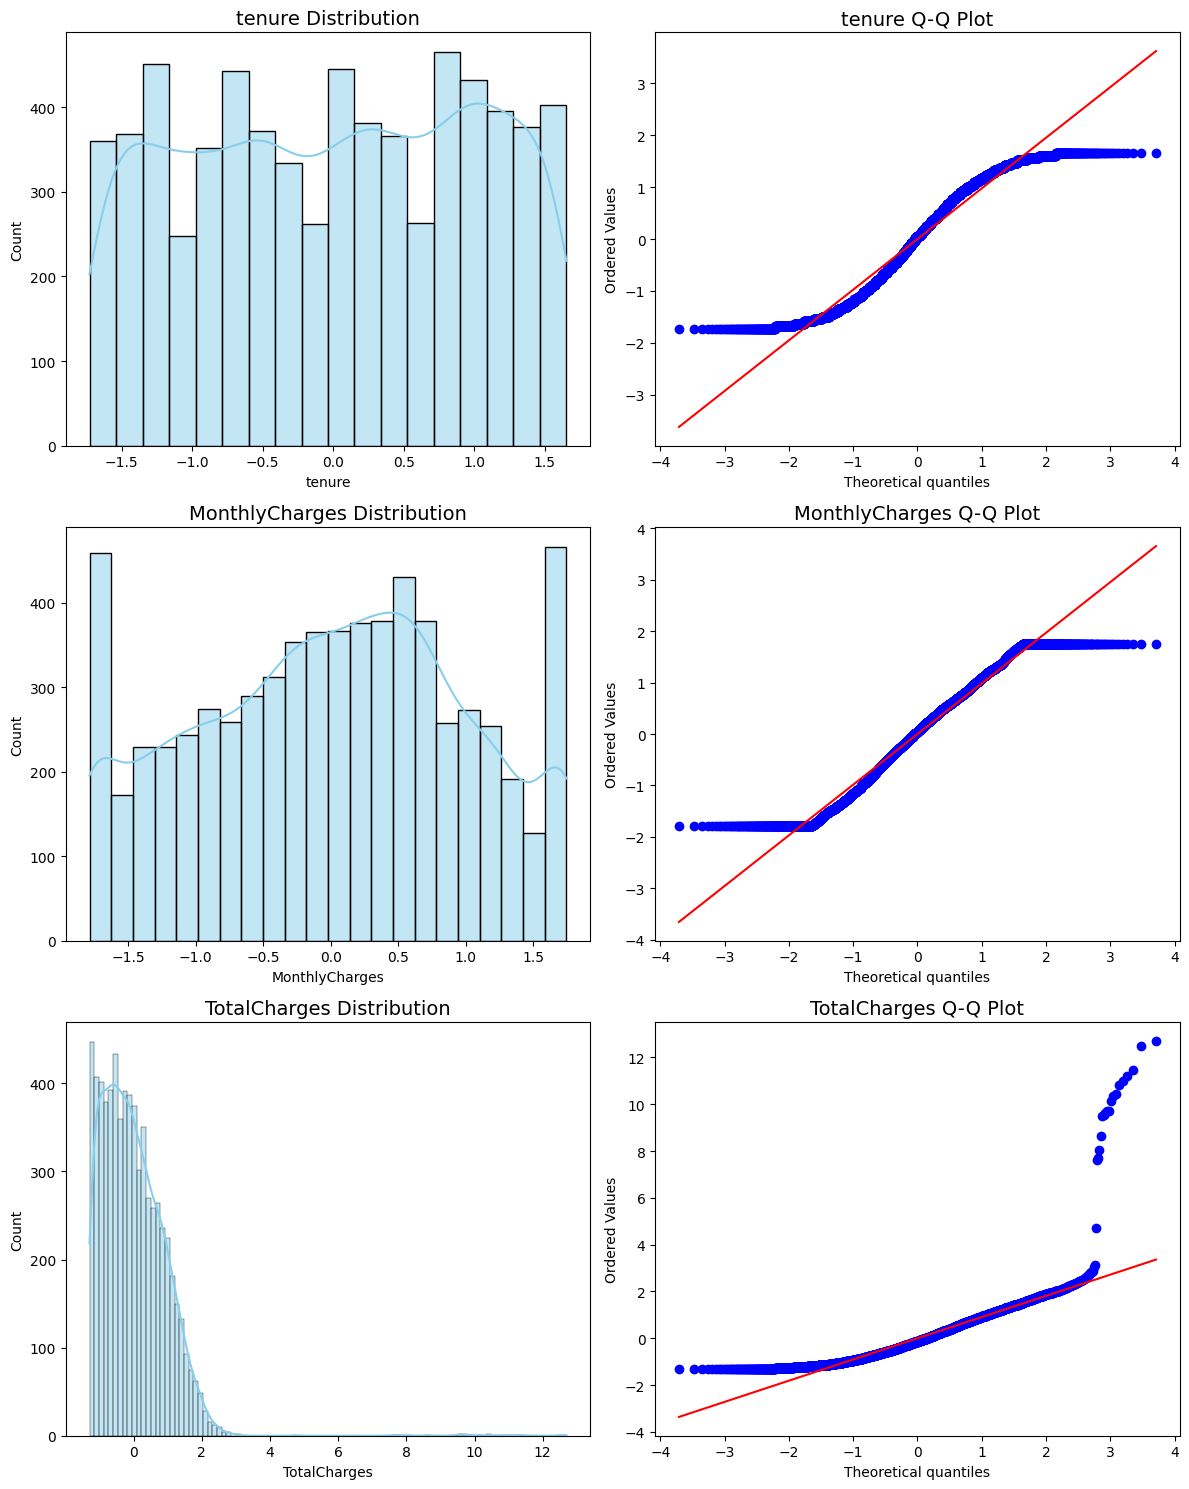

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Features to check
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create plots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 5 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    data = df[feature].dropna()

    # Histogram + KDE
    sns.histplot(data, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'{feature} Distribution', fontsize=14)
    axes[i, 0].set_xlabel(feature)

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Q-Q Plot', fontsize=14)

plt.tight_layout()
plt.show()


# **Step 3: T-Tests (Two Sample Comparison)**

## **T-Tests**

T-tests are used to compare the **means of two groups** to see if they are significantly different.

- **Independent T-Test** — For two separate groups (e.g., churners vs non-churners); assumes data is normally distributed  
- **Mann-Whitney U Test** — Non-parametric alternative when data is not normal  

💡 **Interpretation:**  
- `p < 0.05` → Significant difference  
- `p ≥ 0.05` → No significant difference


In [10]:

ttest_results = []

for feature in numerical_features:
    if feature in df.columns:
        # Separate data by churn
        churn_yes = df[df['Churn'] == 'Yes'][feature].dropna()
        churn_no = df[df['Churn'] == 'No'][feature].dropna()

        # Independent t-test
        t_stat, t_p = stats.ttest_ind(churn_yes, churn_no)

        # Mann-Whitney U test (non-parametric alternative)
        u_stat, u_p = stats.mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

        ttest_results.append({
            'Feature': feature,
            'Churn_Mean': churn_yes.mean(),
            'No_Churn_Mean': churn_no.mean(),
            'Difference': churn_yes.mean() - churn_no.mean(),
            'T_Statistic': t_stat,
            'T_P_Value': t_p,
            'U_P_Value': u_p,
            'Significant': 'Yes' if t_p < 0.05 else 'No'
        })

        print(f"{feature}:")
        print(f"   Churners Mean: {churn_yes.mean():.2f}")
        print(f"   Non-Churners Mean: {churn_no.mean():.2f}")
        print(f"   Difference: {churn_yes.mean() - churn_no.mean():.2f}")
        print(f"   T-test: t={t_stat:.4f}, p={t_p:.4f}")
        print(f"   Mann-Whitney U: p={u_p:.4f}")
        print(f"   Statistically Significant: {'✅ Yes' if t_p < 0.05 else '❌ No'}")
        print()

# Summary table
ttest_df = pd.DataFrame(ttest_results)
print("\nT-Test Summary:")
print(ttest_df.to_string(index=False))



tenure:
   Churners Mean: -0.06
   Non-Churners Mean: 0.05
   Difference: -0.10
   T-test: t=-4.1519, p=0.0000
   Mann-Whitney U: p=0.0000
   Statistically Significant: ✅ Yes

MonthlyCharges:
   Churners Mean: 0.06
   Non-Churners Mean: -0.05
   Difference: 0.12
   T-test: t=4.7461, p=0.0000
   Mann-Whitney U: p=0.0000
   Statistically Significant: ✅ Yes

TotalCharges:
   Churners Mean: -0.02
   Non-Churners Mean: 0.02
   Difference: -0.04
   T-test: t=-1.6787, p=0.0933
   Mann-Whitney U: p=0.0333
   Statistically Significant: ❌ No


T-Test Summary:
       Feature  Churn_Mean  No_Churn_Mean  Difference  T_Statistic  T_P_Value  U_P_Value Significant
        tenure   -0.055199       0.046395   -0.101594    -4.151915   0.000033   0.000044         Yes
MonthlyCharges    0.063209      -0.053121    0.116330     4.746100   0.000002   0.000007         Yes
  TotalCharges   -0.022342       0.018779   -0.041121    -1.678733   0.093251   0.033295          No


## **T-Test Summary (Churn vs Non-Churn)**

- **Tenure** — Churners have significantly lower tenure than non-churners (`p < 0.05`)  
- **MonthlyCharges** — Churners have significantly higher monthly charges than non-churners (`p < 0.05`)  
- **TotalCharges** — No significant difference between churners and non-churners by T-test (`p > 0.05`), though Mann-Whitney U suggests a small difference  

💡 **Interpretation:**  
- **Tenure** and **MonthlyCharges** are important distinguishing features between churners and non-churners  
- **TotalCharges** shows no strong difference


# **📊 Step 4: Visualize Group Differences**

In [12]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']


STEP 4: VISUALIZE GROUP DIFFERENCES


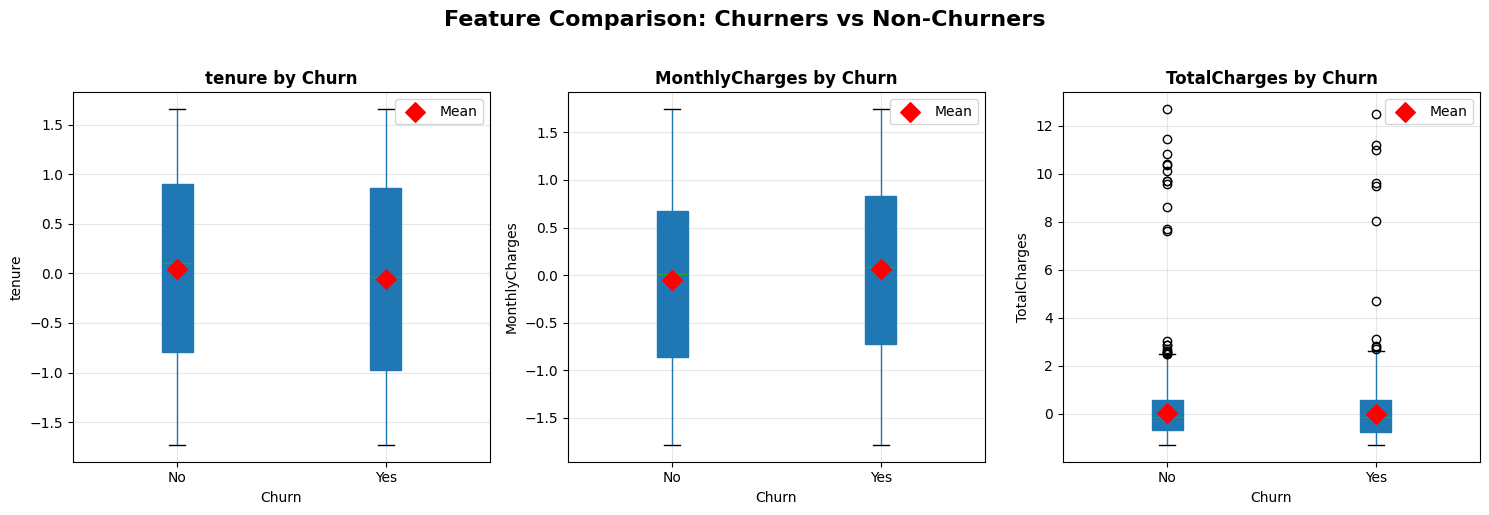

✅ T-test visualizations saved


In [11]:
print("\n" + "="*80)
print("STEP 4: VISUALIZE GROUP DIFFERENCES")
print("="*80)

# Box plots comparing churners vs non-churners
fig, axes = plt.subplots(1, len(numerical_features), figsize=(5*len(numerical_features), 5))

if len(numerical_features) == 1:
    axes = [axes]

for idx, feature in enumerate(numerical_features):
    if feature in df.columns:
        df.boxplot(column=feature, by='Churn', ax=axes[idx], patch_artist=True)
        axes[idx].set_title(f'{feature} by Churn', fontweight='bold')
        axes[idx].set_xlabel('Churn')
        axes[idx].set_ylabel(feature)

        # Add mean markers
        means = df.groupby('Churn')[feature].mean()
        for i, (churn, mean) in enumerate(means.items()):
            axes[idx].scatter(i+1, mean, color='red', s=100, marker='D',
                            zorder=3, label='Mean' if i == 0 else '')

        axes[idx].legend()
        axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Comparison: Churners vs Non-Churners',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('ttest_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ T-test visualizations saved")

# **🧪 Step 5: ANOVA (Multiple Group Comparison)**

## **ANOVA Test**

ANOVA (Analysis of Variance) is used to compare the **means of three or more groups** to see if at least one group mean is significantly different.

- **F-statistic** — Measures the ratio of variance between groups to variance within groups  
- **p-value < 0.05** → Significant difference between groups  
- **Kruskal-Wallis test** — Non-parametric alternative when data is **not normally distributed**


In [13]:
print("\n" + "="*80)
print("STEP 5: ANOVA (Compare Multiple Groups)")
print("="*80)

# Compare numerical features across Contract types
print("Comparing features across Contract types:\n")

categorical_var = 'Contract'
anova_results = []

for feature in numerical_features:
    if feature in df.columns and categorical_var in df.columns:
        # Separate data by contract type
        groups = [df[df[categorical_var] == cat][feature].dropna()
                  for cat in df[categorical_var].unique()]

        # One-way ANOVA
        f_stat, anova_p = stats.f_oneway(*groups)

        # Kruskal-Wallis (non-parametric alternative)
        h_stat, kw_p = stats.kruskal(*groups)

        anova_results.append({
            'Feature': feature,
            'F_Statistic': f_stat,
            'ANOVA_P_Value': anova_p,
            'KW_P_Value': kw_p,
            'Significant': 'Yes' if anova_p < 0.05 else 'No'
        })

        print(f"{feature}:")
        print(f"   ANOVA: F={f_stat:.4f}, p={anova_p:.4f}")
        print(f"   Kruskal-Wallis: H={h_stat:.4f}, p={kw_p:.4f}")
        print(f"   Statistically Significant: {'✅ Yes' if anova_p < 0.05 else '❌ No'}")

        # Show means by group
        print(f"   Means by {categorical_var}:")
        for cat in df[categorical_var].unique():
            mean_val = df[df[categorical_var] == cat][feature].mean()
            print(f"      {cat}: {mean_val:.2f}")
        print()

# Summary table
anova_df = pd.DataFrame(anova_results)
print("\nANOVA Summary:")
print(anova_df.to_string(index=False))



STEP 5: ANOVA (Compare Multiple Groups)
Comparing features across Contract types:

tenure:
   ANOVA: F=0.6952, p=0.4990
   Kruskal-Wallis: H=1.3486, p=0.5095
   Statistically Significant: ❌ No
   Means by Contract:
      One year: 0.03
      Month-to-month: -0.00
      Two year: -0.02

MonthlyCharges:
   ANOVA: F=0.6326, p=0.5312
   Kruskal-Wallis: H=1.4355, p=0.4879
   Statistically Significant: ❌ No
   Means by Contract:
      One year: 0.02
      Month-to-month: -0.00
      Two year: -0.02

TotalCharges:
   ANOVA: F=1.4054, p=0.2453
   Kruskal-Wallis: H=3.5465, p=0.1698
   Statistically Significant: ❌ No
   Means by Contract:
      One year: 0.03
      Month-to-month: 0.00
      Two year: -0.03


ANOVA Summary:
       Feature  F_Statistic  ANOVA_P_Value  KW_P_Value Significant
        tenure     0.695215       0.499003    0.509521          No
MonthlyCharges     0.632585       0.531249    0.487854          No
  TotalCharges     1.405416       0.245337    0.169777          No


## **ANOVA Summary (Comparison Across Contract Types)**

- **Tenure, MonthlyCharges, TotalCharges** — No significant differences were found across contract types (`p > 0.05` in both ANOVA and Kruskal-Wallis tests)  

💡 **Implication:**  
- These numerical features do **not vary meaningfully** between contract groups  
- Contract type may **not influence** these features


# **🧪 Step 6: Chi-Square Test (Categorical Association)**

## **Chi-Square Test**

The Chi-Square test is used to check the **association between two categorical variables**.

- Compares the **observed frequencies** in each category to the **expected frequencies** if the variables were independent  
- **p-value < 0.05** → Significant association (variables are related)  
- **p-value ≥ 0.05** → No significant association (variables are independent)


In [14]:
print("\n" + "="*80)
print("STEP 6: CHI-SQUARE TEST (Categorical Association)")
print("="*80)

# Test association between categorical variables and Churn
categorical_features = ['gender', 'Partner', 'Dependents', 'Contract',
                       'InternetService', 'PaymentMethod']

print("Testing association with Churn:\n")

chi2_results = []

for feature in categorical_features:
    if feature in df.columns:
        # Create contingency table
        contingency_table = pd.crosstab(df[feature], df['Churn'])

        # Chi-square test
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        # Cramér's V (effect size)
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        cramers_v = np.sqrt(chi2 / (n * min_dim))

        chi2_results.append({
            'Feature': feature,
            'Chi2': chi2,
            'P_Value': p_value,
            'DOF': dof,
            'Cramers_V': cramers_v,
            'Associated': 'Yes' if p_value < 0.05 else 'No'
        })

        print(f"{feature}:")
        print(f"   Chi-square: χ²={chi2:.4f}, p={p_value:.4f}, df={dof}")
        print(f"   Cramér's V: {cramers_v:.4f} (Effect size)")
        print(f"   Associated with Churn: {'✅ Yes' if p_value < 0.05 else '❌ No'}")
        print(f"\n   Contingency Table:")
        print(contingency_table)
        print()

# Summary table
chi2_df = pd.DataFrame(chi2_results)
print("\nChi-Square Test Summary:")
print(chi2_df.to_string(index=False))

print("""
💡 Interpretation:
   • p < 0.05: Significant association between variables
   • p ≥ 0.05: No significant association

💡 Cramér's V (Effect Size):
   • 0.0 - 0.1: Weak association
   • 0.1 - 0.3: Moderate association
   • 0.3+: Strong association
""")


STEP 6: CHI-SQUARE TEST (Categorical Association)
Testing association with Churn:

gender:
   Chi-square: χ²=0.8367, p=0.3603, df=1
   Cramér's V: 0.0112 (Effect size)
   Associated with Churn: ❌ No

   Contingency Table:
Churn     No   Yes
gender            
Female  1829  1502
Male    1820  1565

Partner:
   Chi-square: χ²=17.2632, p=0.0000, df=1
   Cramér's V: 0.0507 (Effect size)
   Associated with Churn: ✅ Yes

   Contingency Table:
Churn      No   Yes
Partner            
No       1860  1720
Yes      1789  1347

Dependents:
   Chi-square: χ²=20.8226, p=0.0000, df=1
   Cramér's V: 0.0557 (Effect size)
   Associated with Churn: ✅ Yes

   Contingency Table:
Churn         No   Yes
Dependents            
No          2495  2254
Yes         1154   813

Contract:
   Chi-square: χ²=1777.6970, p=0.0000, df=2
   Cramér's V: 0.5145 (Effect size)
   Associated with Churn: ✅ Yes

   Contingency Table:
Churn             No   Yes
Contract                  
Month-to-month  1248  2481
One year     

## **Chi-Square Test Summary (Categorical Features vs Churn)**

**Significantly associated with Churn (`p < 0.05`):**  
- Partner  
- Dependents  
- Contract  
- InternetService  
- PaymentMethod  

> **Note:** Contract has the strongest association (Cramér’s V = 0.51), while others show weak to moderate associations.

**Not significantly associated with Churn:**  
- Gender (`p = 0.36`, very weak effect, Cramér’s V = 0.01)  

💡 **Interpretation:**  
- Categorical features like **contract type, internet service, payment method, partner, and dependents** are important for distinguishing churners from non-churners  
- **Gender** does **not** influence churn in this dataset


# **📊 Step 7: Correlation Tests**

## **Correlation Tests**

Correlation tests measure the relationship between **two numerical features**:

- **Pearson** — Measures linear correlation, assumes normal data  
  - `r = +1` (perfect positive), `0` (no correlation), `-1` (perfect negative)  
- **Spearman** — Measures monotonic correlation (increasing or decreasing), works for non-normal data  
- **Kendall’s Tau** — Measures ordinal association, good for small samples or ranked data  

💡 **Interpretation:**  
- `p < 0.05` → Significant correlation between features  
- `p ≥ 0.05` → No significant correlation


In [15]:
print("\n" + "="*80)
print("STEP 7: CORRELATION TESTS")
print("="*80)

# Test correlation between numerical features
print("Testing correlations between numerical features:\n")

correlation_results = []

for i, feat1 in enumerate(numerical_features):
    for feat2 in numerical_features[i+1:]:
        if feat1 in df.columns and feat2 in df.columns:
            data1 = df[feat1].dropna()
            data2 = df[feat2].dropna()

            # Ensure same length
            common_idx = df[[feat1, feat2]].dropna().index
            data1 = df.loc[common_idx, feat1]
            data2 = df.loc[common_idx, feat2]

            # Pearson correlation (linear)
            pearson_r, pearson_p = stats.pearsonr(data1, data2)

            # Spearman correlation (monotonic)
            spearman_r, spearman_p = stats.spearmanr(data1, data2)

            # Kendall's Tau
            kendall_tau, kendall_p = stats.kendalltau(data1, data2)

            correlation_results.append({
                'Feature_1': feat1,
                'Feature_2': feat2,
                'Pearson_r': pearson_r,
                'Pearson_p': pearson_p,
                'Spearman_r': spearman_r,
                'Spearman_p': spearman_p,
                'Kendall_tau': kendall_tau,
                'Significant': 'Yes' if pearson_p < 0.05 else 'No'
            })

            print(f"{feat1} ↔ {feat2}:")
            print(f"   Pearson r: {pearson_r:.4f}, p={pearson_p:.4f}")
            print(f"   Spearman ρ: {spearman_r:.4f}, p={spearman_p:.4f}")
            print(f"   Kendall τ: {kendall_tau:.4f}, p={kendall_p:.4f}")
            print(f"   Significant: {'✅ Yes' if pearson_p < 0.05 else '❌ No'}")
            print()

# Summary table
corr_df = pd.DataFrame(correlation_results)
print("\nCorrelation Test Summary:")
print(corr_df.to_string(index=False))

print("""
💡 Correlation Coefficients:
   • +1: Perfect positive correlation
   • 0: No correlation
   • -1: Perfect negative correlation

💡 Which test to use:
   • Pearson: Linear relationship, normal data
   • Spearman: Monotonic relationship, non-normal data
   • Kendall: Ordinal data, small samples
""")


STEP 7: CORRELATION TESTS
Testing correlations between numerical features:

tenure ↔ MonthlyCharges:
   Pearson r: -0.0078, p=0.5249
   Spearman ρ: -0.0060, p=0.6241
   Kendall τ: -0.0040, p=0.6229
   Significant: ❌ No

tenure ↔ TotalCharges:
   Pearson r: 0.7384, p=0.0000
   Spearman ρ: 0.8844, p=0.0000
   Kendall τ: 0.7214, p=0.0000
   Significant: ✅ Yes

MonthlyCharges ↔ TotalCharges:
   Pearson r: 0.3582, p=0.0000
   Spearman ρ: 0.3839, p=0.0000
   Kendall τ: 0.2722, p=0.0000
   Significant: ✅ Yes


Correlation Test Summary:
     Feature_1      Feature_2  Pearson_r     Pearson_p  Spearman_r    Spearman_p  Kendall_tau Significant
        tenure MonthlyCharges  -0.007776  5.249204e-01   -0.005993  6.241051e-01    -0.004047          No
        tenure   TotalCharges   0.738351  0.000000e+00    0.884380  0.000000e+00     0.721442         Yes
MonthlyCharges   TotalCharges   0.358170 1.274426e-201    0.383854 9.602025e-234     0.272196         Yes

💡 Correlation Coefficients:
   • +1: Pe

## **Correlation Summary (Numerical Features)**

- **Tenure ↔ TotalCharges** — Strong positive correlation (`Pearson r = 0.74, p < 0.05`)  
- **MonthlyCharges ↔ TotalCharges** — Moderate positive correlation (`Pearson r = 0.36, p < 0.05`)  
- **Tenure ↔ MonthlyCharges** — No significant correlation (`r ≈ 0, p > 0.05`)  

💡 **Interpretation:**  
- **TotalCharges** is strongly related to **Tenure** and moderately related to **MonthlyCharges**  
- **Tenure** and **MonthlyCharges** are independent


# **3. Correlation Analysis Advanced**

# **📊 Step 1: Correlation Matrix with P-Values**


ADVANCED CORRELATION ANALYSIS

STEP 1: CORRELATION MATRIX WITH P-VALUES
Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000       -0.007776      0.737974
MonthlyCharges -0.007776        1.000000      0.358170
TotalCharges    0.737974        0.358170      1.000000


P-Value Matrix:
                 tenure  MonthlyCharges   TotalCharges
tenure          0.00000    5.249204e-01   0.000000e+00
MonthlyCharges  0.52492    0.000000e+00  1.274426e-201
TotalCharges    0.00000   1.274426e-201   0.000000e+00


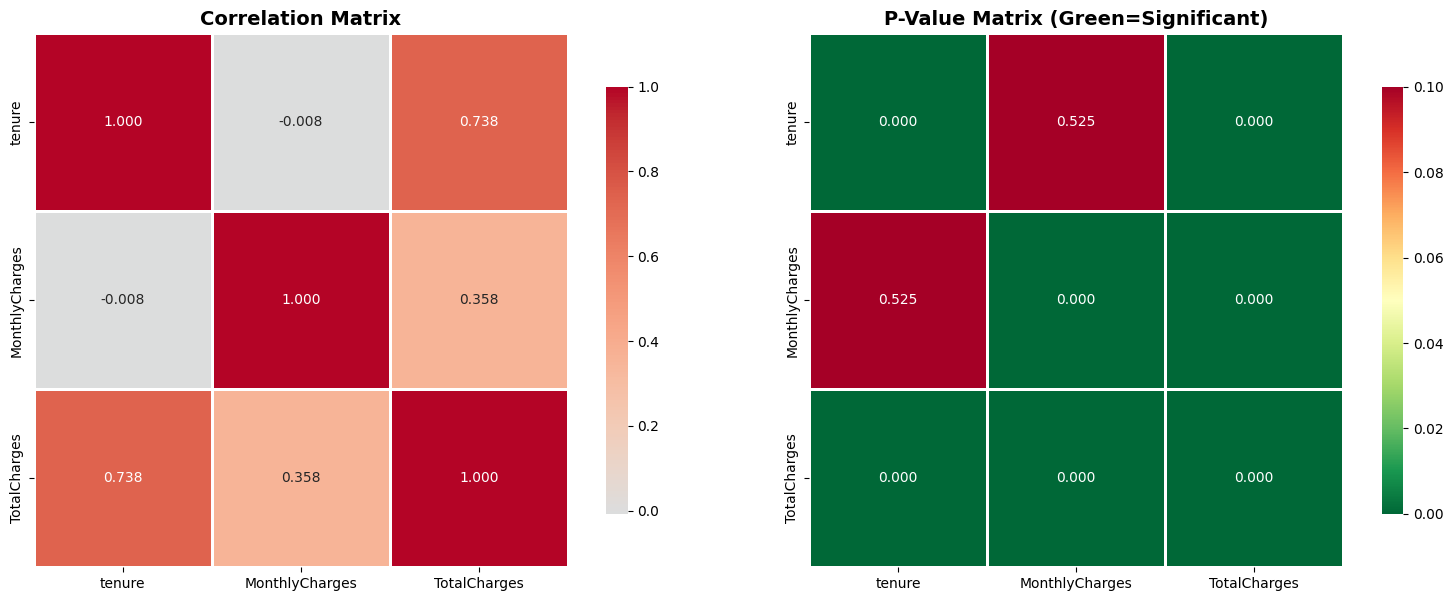


✅ Correlation analysis saved


In [16]:
print("\n" + "="*80)
print("ADVANCED CORRELATION ANALYSIS")
print("="*80)

print("\n" + "="*80)
print("STEP 1: CORRELATION MATRIX WITH P-VALUES")
print("="*80)

# Calculate correlation and p-values
def calculate_pvalues(df):
    """Calculate p-values for correlations"""
    df_corr = df.corr()
    pval_matrix = pd.DataFrame(np.zeros_like(df_corr),
                               columns=df_corr.columns,
                               index=df_corr.index)

    for i in range(len(df_corr.columns)):
        for j in range(len(df_corr.columns)):
            if i != j:
                try:
                    _, p_val = stats.pearsonr(df.iloc[:, i].dropna(),
                                            df.iloc[:, j].dropna())
                    pval_matrix.iloc[i, j] = p_val
                except:
                    pval_matrix.iloc[i, j] = np.nan

    return pval_matrix

# Get numerical data
numerical_df = df[numerical_features].dropna()

# Calculate correlation and p-values
corr_matrix = numerical_df.corr()
pval_matrix = calculate_pvalues(numerical_df)

print("Correlation Matrix:")
print(corr_matrix)

print("\n\nP-Value Matrix:")
print(pval_matrix)

# Create annotated heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0])
axes[0].set_title('Correlation Matrix', fontweight='bold', fontsize=14)

# P-value heatmap
sns.heatmap(pval_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=0, vmax=0.1, ax=axes[1])
axes[1].set_title('P-Value Matrix (Green=Significant)', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('correlation_with_pvalues.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Correlation analysis saved")

# **📋 Summary Report**

In [17]:
print("\n" + "="*80)
print("STATISTICAL ANALYSIS SUMMARY REPORT")
print("="*80)

summary = f"""
✅ MULTICOLLINEARITY (VIF) ANALYSIS:
   • Features analyzed: {len(numerical_cols)}
   • Low VIF (< 5): {len(low_vif)}
   • Moderate VIF (5-10): {len(moderate_vif)}
   • High VIF (≥ 10): {len(high_vif)}
   {'   ⚠️  Action: Remove high VIF features!' if len(high_vif) > 0 else '   ✅ No multicollinearity issues'}

✅ NORMALITY TESTS:
   • Features tested: {len(numerical_features)}
   • Normal distribution: {sum(1 for r in normality_results if r['Normal'] == 'Yes')}
   • Non-normal distribution: {sum(1 for r in normality_results if r['Normal'] == 'No')}

✅ T-TESTS (Two Group Comparison):
   • Features tested: {len(ttest_results)}
   • Significant differences: {sum(1 for r in ttest_results if r['Significant'] == 'Yes')}

✅ ANOVA (Multiple Group Comparison):
   • Features tested: {len(anova_results)}
   • Significant differences: {sum(1 for r in anova_results if r['Significant'] == 'Yes')}

✅ CHI-SQUARE TESTS (Categorical Association):
   • Features tested: {len(chi2_results)}
   • Significant associations: {sum(1 for r in chi2_results if r['Associated'] == 'Yes')}

✅ CORRELATION TESTS:
   • Pairs tested: {len(correlation_results)}
   • Significant correlations: {sum(1 for r in correlation_results if r['Significant'] == 'Yes')}

📁 FILES CREATED:
   • vif_analysis.png
   • normality_tests.png
   • ttest_visualization.png
   • correlation_with_pvalues.png
   • data_no_multicollinearity.csv
"""

print(summary)

# Save report
with open('Statistical_Analysis_Report.txt', 'w') as f:
    f.write(summary)

print("✅ Statistical analysis report saved!")


STATISTICAL ANALYSIS SUMMARY REPORT

✅ MULTICOLLINEARITY (VIF) ANALYSIS:
   • Features analyzed: 40
   • Low VIF (< 5): 20
   • Moderate VIF (5-10): 3
   • High VIF (≥ 10): 17
      ⚠️  Action: Remove high VIF features!

✅ NORMALITY TESTS:
   • Features tested: 3
   • Normal distribution: 0
   • Non-normal distribution: 3

✅ T-TESTS (Two Group Comparison):
   • Features tested: 3
   • Significant differences: 2

✅ ANOVA (Multiple Group Comparison):
   • Features tested: 3
   • Significant differences: 0

✅ CHI-SQUARE TESTS (Categorical Association):
   • Features tested: 6
   • Significant associations: 5

✅ CORRELATION TESTS:
   • Pairs tested: 3
   • Significant correlations: 2

📁 FILES CREATED:
   • vif_analysis.png
   • normality_tests.png
   • ttest_visualization.png
   • correlation_with_pvalues.png
   • data_no_multicollinearity.csv

✅ Statistical analysis report saved!


## 🎓 **Key Takeaways**

### **What We Learned**

1. **Multicollinearity (VIF):**
   - ✅ How to detect correlated features  
   - ✅ VIF interpretation (`< 5` good, `> 10` bad)  
   - ✅ Solutions: Remove, combine, or use regularization  

2. **Normality Tests:**
   - ✅ Shapiro-Wilk test (best for small/medium samples)  
   - ✅ Kolmogorov-Smirnov test (better for large samples)  
   - ✅ Q-Q plots for visual assessment  

3. **Group Comparisons:**
   - ✅ T-test for 2 groups (normal data)  
   - ✅ Mann-Whitney U (non-parametric alternative)  
   - ✅ ANOVA for 3+ groups  
   - ✅ Kruskal-Wallis (non-parametric alternative)  

4. **Association Tests:**
   - ✅ Chi-square for categorical variables  
   - ✅ Cramér's V for effect size  
   - ✅ Pearson, Spearman, Kendall correlations  

---

### **When to Use Each Test**

| Question | Normal Data | Non-Normal Data |
|----------|------------|----------------|
| Two groups different? | T-test | Mann-Whitney U |
| 3+ groups different? | ANOVA | Kruskal-Wallis |
| Variables associated? | Pearson r | Spearman ρ |
| Categories associated? | Chi-square | Chi-square |

---

### **Critical Decisions**

✅ **Remove features if:**  
- VIF > 10  
- Highly correlated (`|r| > 0.9`)  
- Not significantly related to target  

✅ **Keep features if:**  
- VIF < 5  
- Low correlation with others  
- Significantly related to target


# **🎉 You've completed Part 3.5: Statistical Analysis!**